# Customer Lifetime Value Practice
- Mukunda Aithal


In [66]:
import pandas as pd
import numpy as np
import matplotlib as plt
from pandas_profiling import ProfileReport
from datetime import datetime
from dateutil import relativedelta

## Understand the dataset

In [2]:
data = pd.read_csv('transactions.csv')
data

,TransactionID,TransactionDate,CustomerID,Amount
0,1,9/4/2012,1,20.26
1,2,5/15/2012,2,10.87
2,3,5/23/2014,2,2.21
3,4,10/24/2014,2,10.48
4,5,10/13/2012,2,3.94
...,...,...,...,...
4181,4182,6/23/2013,1000,3.86
4182,4183,8/7/2011,1000,4.00
4183,4184,10/7/2012,1000,18.37
4184,4185,1/9/2014,1000,3.45


Most of the EDA can be done using the profile report below. Much of the answers reference this.

In [6]:
profile = ProfileReport(data)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

There do not seem to be any missing cells or values in this dataset.

### Dataset Range

In [10]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate']) # If your Date column is of the type object otherwise skip this
date_range = str(data['TransactionDate'].dt.date.min()) + ' to ' +str(data['TransactionDate'].dt.date.max())
date_range

'2010-01-04 to 2015-12-31'

There are 1000 distinct customers.

### min, max, variance, and standard deviations
- min = -1
- max = 2033
- variance = 1499.541111
- std = 38.72390877

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TransactionID,4186.0,2093.500000,1208.538442,1.0,1047.25,2093.500,3139.75,4186.0
CustomerID,4186.0,516.165791,291.465283,1.0,270.00,522.000,762.75,1000.0
Amount,4186.0,9.028082,38.723909,-1.0,3.31,6.885,11.69,2033.0


### Outlier Handling

<AxesSubplot:xlabel='TransactionDate'>

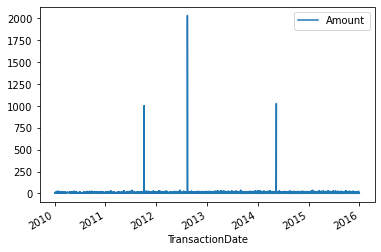

In [15]:
data.plot(x="TransactionDate", y="Amount")

There are some outliers that are hiding trends.

In [17]:
data2 = data[data.Amount != 2033.0]
data2 = data2[data2.Amount != 1027.0]
data2 = data2[data2.Amount != 1003.0]
data2

,TransactionID,TransactionDate,CustomerID,Amount
0,1,2012-09-04,1,20.26
1,2,2012-05-15,2,10.87
2,3,2014-05-23,2,2.21
3,4,2014-10-24,2,10.48
4,5,2012-10-13,2,3.94
...,...,...,...,...
4181,4182,2013-06-23,1000,3.86
4182,4183,2011-08-07,1000,4.00
4183,4184,2012-10-07,1000,18.37
4184,4185,2014-01-09,1000,3.45


<AxesSubplot:xlabel='TransactionDate'>

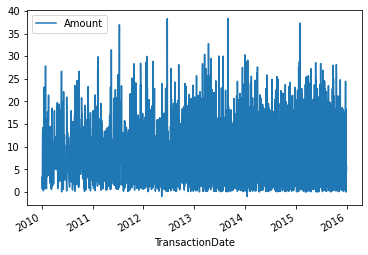

In [18]:
data2.plot(x="TransactionDate", y="Amount")

If we remove these outliers and plot again, it seems like there is no general increase in transaction amount over time.

## Determine origin year of customers

In [151]:
cust_data = data2.groupby('CustomerID')

In [152]:
for custID, row in cust_data.first().iterrows():
    df = cust_data.get_group(custID).set_index('TransactionDate').sort_index(axis=0,ascending=True)
    origin_year = df.index[0].year
    data2.loc[data2['CustomerID'] == custID, 'Origin'] = origin_year
data2

,TransactionID,TransactionDate,CustomerID,Amount,Origin
0,1,2012-09-04,1,20.26,2012
1,2,2012-05-15,2,10.87,2012
2,3,2014-05-23,2,2.21,2012
3,4,2014-10-24,2,10.48,2012
4,5,2012-10-13,2,3.94,2012
...,...,...,...,...,...
4181,4182,2013-06-23,1000,3.86,2010
4182,4183,2011-08-07,1000,4.00,2010
4183,4184,2012-10-07,1000,18.37,2010
4184,4185,2014-01-09,1000,3.45,2010


## Calculate cumulative transaction amounts

In [153]:
origin_df = data2.groupby('Origin')
origin_df.get_group(2010).sort_values(by=['TransactionDate'])

,TransactionID,TransactionDate,CustomerID,Amount,Origin
1736,1737,2010-01-04,429,3.27,2010
816,817,2010-01-05,211,0.67,2010
1256,1257,2010-01-07,322,13.02,2010
2627,2628,2010-01-09,660,4.34,2010
3287,3288,2010-01-09,802,14.21,2010
...,...,...,...,...,...
3090,3091,2015-12-21,754,3.70,2010
4160,4161,2015-12-22,998,7.10,2010
2924,2925,2015-12-24,717,12.74,2010
2507,2508,2015-12-27,635,0.06,2010


In [154]:
column_names = ["Origin", "12", "24", "36", "48", "60", "72"]
origin_years = ['2010', '2011', '2012', '2013', '2014', '2015']
cum_amounts = pd.DataFrame(columns = column_names)
cum_amounts['Origin'] = origin_years
cum_amounts = cum_amounts.fillna(0)
cum_amounts

,Origin,12,24,36,48,60,72
0,2010,0,0,0,0,0,0
1,2011,0,0,0,0,0,0
2,2012,0,0,0,0,0,0
3,2013,0,0,0,0,0,0
4,2014,0,0,0,0,0,0
5,2015,0,0,0,0,0,0


In [155]:
for year, row in origin_df.first().iterrows():
    df = origin_df.get_group(year)
    df = df.sort_values(by=['TransactionDate'])
    for index, transaction in df.iterrows():
        origin = datetime.strptime(str(year) + "-01-01",'%Y-%m-%d')
        months = (transaction['TransactionDate'] - origin) / np.timedelta64(1, 'M')
        if months <= 12:
            cum_amounts.loc[cum_amounts["Origin"] == str(year), '12'] += transaction['Amount']
        elif months > 12 and months <= 24: 
            cum_amounts.loc[cum_amounts["Origin"] == str(year), '24'] += transaction['Amount']
        elif months > 24 and months <= 36: 
            cum_amounts.loc[cum_amounts["Origin"] == str(year), '36'] += transaction['Amount']
        elif months > 36 and months <= 48: 
            cum_amounts.loc[cum_amounts["Origin"] == str(year), '48'] += transaction['Amount']
        elif months > 48 and months <= 60: 
            cum_amounts.loc[cum_amounts["Origin"] == str(year), '60'] += transaction['Amount']
        else:
            cum_amounts.loc[cum_amounts["Origin"] == str(year), '72'] += transaction['Amount']
cum_amounts

,Origin,12,24,36,48,60,72
0,2010,2262.13,1352.65,1660.03,1357.56,1298.32,1033.8
1,2011,2252.70,1504.20,1708.09,1237.12,1159.13,0.0
2,2012,2181.35,1693.34,1352.17,1274.99,0.00,0.0
3,2013,2179.85,1428.96,1617.94,0.00,0.00,0.0
4,2014,1830.85,1431.20,0.00,0.00,0.00,0.0
5,2015,1912.17,0.00,0.00,0.00,0.00,0.0


This is still not what we need since each row needs to be cumsummed. This is taken care of below.

In [156]:
for index, row in cum_amounts.iterrows():
    if str(row['Origin']) == '2010':
        cum_amounts.at[index,'24'] = row['12'] + row['24']
        cum_amounts.at[index,'36'] = row['12'] + row['24'] + row['36']
        cum_amounts.at[index,'48'] = row['12'] + row['24'] + row['36'] + row['48']
        cum_amounts.at[index,'60'] = row['12'] + row['24'] + row['36'] + row['48'] + row['60']
        cum_amounts.at[index,'72'] = row['12'] + row['24'] + row['36'] + row['48'] + row['60'] + row['72']
    elif str(row['Origin']) == '2011':
        cum_amounts.at[index,'24'] = row['12'] + row['24']
        cum_amounts.at[index,'36'] = row['12'] + row['24'] + row['36']
        cum_amounts.at[index,'48'] = row['12'] + row['24'] + row['36'] + row['48']
        cum_amounts.at[index,'60'] = row['12'] + row['24'] + row['36'] + row['48'] + row['60']
    elif str(row['Origin']) == '2012':
        cum_amounts.at[index,'24'] = row['12'] + row['24']
        cum_amounts.at[index,'36'] = row['12'] + row['24'] + row['36']
        cum_amounts.at[index,'48'] = row['12'] + row['24'] + row['36'] + row['48']
    elif str(row['Origin']) == '2013':
        cum_amounts.at[index,'24'] = row['12'] + row['24']
        cum_amounts.at[index,'36'] = row['12'] + row['24'] + row['36']
    elif str(row['Origin']) == '2014':
        cum_amounts.at[index,'24'] = row['12'] + row['24']

cum_amounts


,Origin,12,24,36,48,60,72
0,2010,2262.13,3614.78,5274.81,6632.37,7930.69,8964.49
1,2011,2252.70,3756.90,5464.99,6702.11,7861.24,0.00
2,2012,2181.35,3874.69,5226.86,6501.85,0.00,0.00
3,2013,2179.85,3608.81,5226.75,0.00,0.00,0.00
4,2014,1830.85,3262.05,0.00,0.00,0.00,0.00
5,2015,1912.17,0.00,0.00,0.00,0.00,0.00


This is the final table of cumulative transactions for each group.

## Calculate cumulative new customer amounts

In [157]:
column_names = ["Origin", "12", "24", "36", "48", "60", "72"]
origin_years = ['2010', '2011', '2012', '2013', '2014', '2015']
cum_customers = pd.DataFrame(columns = column_names)
cum_customers['Origin'] = origin_years
cum_customers = cum_customers.fillna(0)
cum_customers

,Origin,12,24,36,48,60,72
0,2010,0,0,0,0,0,0
1,2011,0,0,0,0,0,0
2,2012,0,0,0,0,0,0
3,2013,0,0,0,0,0,0
4,2014,0,0,0,0,0,0
5,2015,0,0,0,0,0,0


In [158]:
for year, row in origin_df.first().iterrows():
    df = origin_df.get_group(year)
    new_custs = len(pd.unique(df['CustomerID']))
    for index, transaction in df.iterrows():
        if str(year) == '2010':
            cum_customers.loc[cum_customers["Origin"] == str(year), '12'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '24'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '36'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '48'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '60'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '72'] = new_custs
        elif str(year) == '2011': 
            cum_customers.loc[cum_customers["Origin"] == str(year), '12'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '24'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '36'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '48'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '60'] = new_custs
        elif str(year) == '2012': 
            cum_customers.loc[cum_customers["Origin"] == str(year), '12'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '24'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '36'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '48'] = new_custs
        elif str(year) == '2013': 
            cum_customers.loc[cum_customers["Origin"] == str(year), '12'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '24'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '36'] = new_custs
        elif str(year) == '2014': 
            cum_customers.loc[cum_customers["Origin"] == str(year), '12'] = new_custs
            cum_customers.loc[cum_customers["Origin"] == str(year), '24'] = new_custs
        elif str(year) == '2015': 
            cum_customers.loc[cum_customers["Origin"] == str(year), '12'] = new_custs

cum_customers

,Origin,12,24,36,48,60,72
0,2010,172,172,172,172,172,172
1,2011,170,170,170,170,170,0
2,2012,163,163,163,163,0,0
3,2013,180,180,180,0,0,0
4,2014,155,155,0,0,0,0
5,2015,160,0,0,0,0,0


This is the final table for total new customers for each year group.

## Historic CLV

In [159]:
df1 = cum_amounts.set_index('Origin').sort_index(axis=0,ascending=True)
df2 = cum_customers.set_index('Origin').sort_index(axis=0,ascending=True)

In [160]:
clv = df1.div(df2)
clv

,12,24,36,48,60,72
Origin,,,,,,
2010,13.151919,21.016163,30.667500,38.560291,46.108663,52.119128
2011,13.251176,22.099412,32.147000,39.424176,46.242588,NaN
2012,13.382515,23.771104,32.066626,39.888650,NaN,NaN
2013,12.110278,20.048944,29.037500,NaN,NaN,NaN
2014,11.811935,21.045484,NaN,NaN,NaN,NaN
2015,11.951063,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Historic CLV'}, xlabel='Age', ylabel='HistoricCLV'>

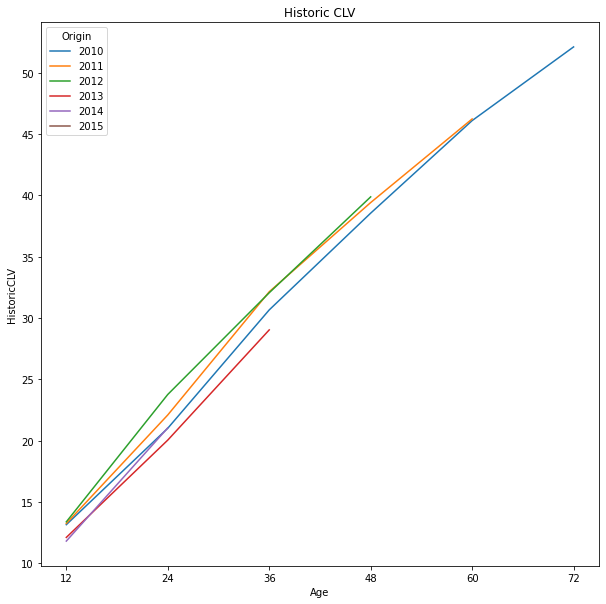

In [169]:
clvt = clv.transpose()
clvt.plot(title='Historic CLV', xlabel = 'Age', ylabel = 'HistoricCLV', figsize=(10,10))


In [170]:
clvt

Origin,2010,2011,2012,2013,2014,2015
12,13.151919,13.251176,13.382515,12.110278,11.811935,11.951063
24,21.016163,22.099412,23.771104,20.048944,21.045484,NaN
36,30.667500,32.147000,32.066626,29.037500,NaN,NaN
48,38.560291,39.424176,39.888650,NaN,NaN,NaN
60,46.108663,46.242588,NaN,NaN,NaN,NaN
72,52.119128,NaN,NaN,NaN,NaN,NaN


In [171]:
numerator = clv.multiply(df2)
numerator

,12,24,36,48,60,72
Origin,,,,,,
2010,2262.13,3614.78,5274.81,6632.37,7930.69,8964.49
2011,2252.70,3756.90,5464.99,6702.11,7861.24,NaN
2012,2181.35,3874.69,5226.86,6501.85,NaN,NaN
2013,2179.85,3608.81,5226.75,NaN,NaN,NaN
2014,1830.85,3262.05,NaN,NaN,NaN,NaN
2015,1912.17,NaN,NaN,NaN,NaN,NaN


In [182]:
weighted_clv = pd.DataFrame(numerator.sum()/df2.sum())
weighted_clv.index.names = ['Age']
weighted_clv = weighted_clv.rename(columns={"0": "HistoricCLV"})
weighted_clv

,0
Age,
12,12.619050
24,21.568131
36,30.939285
48,39.279861
60,46.175234
72,52.119128


## Interpreting results

### -How much have customers acquired in 2011 spent to date?

Customers acquired in 2011 have spend $7861.24 to date. This is derived by looking at the cumulative transaction amounts for customers acquired in 2011 who are more than 60 months old. 

### -Do each group of customers exhibit similar or different patterns of spending? What’s the implication for the business?

Examining the the historic CLV plot and table, it seems like there is no difference in spending patterns between any of the origin groups. This implies that the business is not having much of a change in how much customers are spending over time. Older customers are not spending considerably more or less every transaction compared to newer customers. This means that customer retention is important for the business because as as customers grow, their cumulative spending will increase. 